Suponga que se entrevistan a 15000 personas para aplicar al puesto de astronautas. De los cuales se escogerán exclusivamente 15. El trabajo duro, la aptitud y desempeño juegan un rol fundamental para la selección de los candidatos, pero la suerte durante la entrevista y el proceso de selección también lo juega. Realice un algoritmo para simular:


In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#Importamos datos necesarios para tener nombres que puedan identificar a los participantes
df_names = pd.read_csv('https://raw.githubusercontent.com/tomasate/Datos_Clases/main/Datos_1/names.csv')
df_lastnames = pd.read_csv('https://raw.githubusercontent.com/marcboquet/spanish-names/master/apellidos.csv')

#Seleccionamos exclusivamente la cantidad de usuarios que requerimos
names = df_names.loc[:130,'nombre']
lastnames = df_lastnames.loc[:130,'apellido']\
                        .apply(str.lower)\
                        .apply(str.capitalize)

#Construcción de lista de nombres
nombres = [element[0] +" "+  element[1] for element in
           list(itertools.product(names.to_list(),
                                  lastnames.to_list()
                                  )
           )][:15000]


In [ ]:
nombres

In [ ]:
def get_luck_means_stds_df(nombres_list : list = nombres ,
                           eff_coef : float = 0.90 ,
                           luck_coef : float  = 0.10):

  """
  Toma una lista de nombres, genera números aleatorios de esfuerzo y suerte
  con distribuciones gaussianas y uniformes para cada uno de los nombres en
  la lista y guarda todo en un DataFrame de pandas. Además calcula en una columna
  adicional del Dataframe el desempeño de cada participante como una combinación
  lineal de el esuerzo y la suerte, con parámetros de eff_coef y luck_coef, ordena
  el DataFrame por el esfuerzo de forma descendente y finalmente presenta los primeros
  15 que serían los seleccionados.

  La función devuelve el valor promedio y la desviasión estandard de la suerte de los
  ganadores, así como el DataFrame donde está la info de cada uno de ellos.

  Ej: Supongamos que se quiere hacer un ejemplo donde los nombres_list están en una lista
      llamada  names, y los coeficientes son 0.95 y 0.05:

      In[1]: get_luck_means_stds(nombres_list = names,
                                 eff_coef = 0.95,
                                 luck_coef = 0.05)
  """
  df = pd.DataFrame(data = nombres_list, columns = ['Names'])
  df['Efford'] = np.random.normal(75,
                                  6,
                                  len(nombres_list))
  df['Luck'] = np.random.uniform(0,
                                 100,
                                 len(nombres_list))
  df['Performance'] = df['Efford'] * eff_coef\
                      + df['Luck'] * luck_coef
  df_winners = df.sort_values(by = 'Performance',
                              ascending = False).iloc[:15]

  return (df_winners['Luck'].mean(),
          df_winners['Luck'].std(),
          df)


In [ ]:
get_luck_means_stds_df()[:2]

(83.55577959120298, 11.164460229280216)

In [ ]:
# Realización de 100 experimentos de selección de astronautas
lt = [get_luck_means_stds_df()[0:2] for i in range(100)]

#promedios y desviaciones por experimento
mus = [element[0] for element in lt]
sigmas = [element[1] for element in lt]

In [ ]:
#binneado para graficación
bins = [i for i in range(60,110,30)]
min(mus), max(mus)

(73.1665314361083, 92.40581092417064)

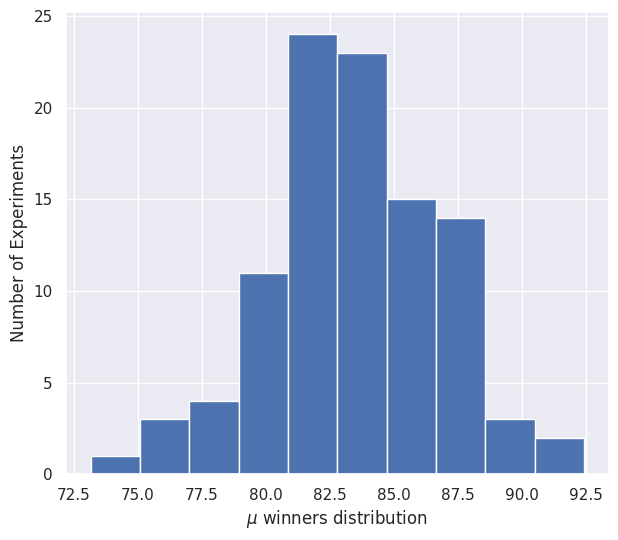

In [ ]:
plt.figure(figsize = (7, 6))
plt.hist(mus, bins = 10)
plt.xlabel(r'$\mu$ winners distribution')
plt.ylabel(r'Number of Experiments')
plt.show()

Esta distribución muestra y nos da una idea de cuál es el comportamiento de la suerte de los seleccionados a traves de varias repeticiones de los experimentos. En este caso podríamos formular una hipótesis estadística $H_1$: Los astronautas seleccionados suelen tener un promedio de suerte mayor a $80$ puntos en un rango $[0,100]$. Para ello utilizamos una función de distribución $Z$.


$$Z = \frac{\bar{x} - \mu}{\frac{\sigma ^2}{\sqrt{n}}}$$

Ahora daremos un valor de la significancia $\alpha$, que determinará la probabilidad de cometer un error de tipo I al rechazar incorrectamente la hipótesis nula.

En nuestro caso $\mu = 80$, $\bar{x}$ es el promedio de las medias de la suerte sobre los experimentos, $\sigma$ es la desviación estandar de los promedios de suerte sobre todos los experimentos y finalmente $n = 100$. Además si consultamos en una tabla de Z-test el valor de Z correspondiente a $\alpha$ veremos que es equivalente a $1.65$. En nuestro caso quiere decir que si obtenemos $Z > 1.65$ podemos rechazar la hipótesis nula con una aceptancia de $95 \%$.

In [ ]:
#Variables para el test de hipótesis
x_bar = np.mean(mus)
mu = 80
sigma = np.std(mus)
n = 100

Con esto podemos calcular el valor $Z$ de nuestros datos

In [ ]:
Z = (x_bar-mu)/(sigma/(n**0.5))
Z

9.900954495244772

Podemos ver que nuestro valor de $Z$ es mayor que el $Z_C$ crítico. Por lo que descartamos nuestra hipótesis nula $H_0$ y aceptamos nuestra hipótesis auxiliar:  Los astronautas seleccionados suelen tener un promedio de suerte mayor a  80  puntos en un rango  [0,100]